## Import our libraries, load our dataset

In [ ]:
# Link to medium post: https://medium.com/@evangelista.ira/the-state-of-solar-a-bright-future-cf98eeb6b8df
# Link to dataset: https://drive.google.com/open?id=1N326wC0yfWmlWNaEEUfTIkG2OjkFxky5
# Public dataset (unmerged): trackingthesun.lbl.gov


In [57]:
# Revision #6.

import pandas as pd
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pipelines, Regressions, Encoding.
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# OLS Model
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Custom Visualization Tools
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('mask.csv')

C:\Users\evang\Anaconda3\envs\Unit2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,14,17,21,22,24,26,34,36,37,38,39,41,42,43,50,51,53,54,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
df.head()

(1198663, 65)


,Unnamed: 0,Data Provider,System ID (from Data Provider),System ID (Tracking the Sun),Installation Date,System Size,Total Installed Price,Appraised Value Flag,Sales Tax Cost,Rebate or Grant,...,Inverter Quantity #2,Inverter Manufacturer #3,Inverter Model #3,Inverter Quantity #3,Additional inverter model,Microinverter #1,Microinverter #2,Microinverter #3,DC Optimizer,Year_Installed
0,0,State Energy Office,-9999,AR_EDC_1,2010-04-29,2.016,14558.0,False,510.762764,0.0,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,0,2010
1,1,State Energy Office,-9999,AR_EDC_2,2010-04-26,3.360,26096.0,False,851.271273,0.0,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,0,2010
2,2,State Energy Office,-9999,AR_EDC_3,2010-04-20,13.440,91139.0,False,3405.085091,0.0,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,0,2010
3,3,State Energy Office,-9999,AR_EDC_4,2010-04-21,5.520,40043.0,False,1398.517091,0.0,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,0,2010
4,4,State Energy Office,-9999,AR_EDC_5,2010-04-22,2.530,21497.0,False,640.987000,0.0,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,0,2010


In [4]:
# Basis behind breaking val and test -- year arrangement
df = df.sort_values('Year_Installed')

## NaN values, holdout of data

In [5]:
target = 'System Size'
# features = df.drop[columns='target']

train = df[:-150000]
val = df[-150000:-50000]
test = df[-50000:]

In [6]:
train.shape, test.shape, val.shape

((1048663, 65), (50000, 65), (100000, 65))

In [7]:
df = df.replace(-9999, np.NaN)

In [8]:
df.isnull().sum().sort_values(ascending=False)

Inverter Quantity #3                            1198663
Inverter Quantity #2                            1198663
Inverter Quantity #1                            1198663
Microinverter #3                                1194090
Azimuth #3                                      1186800
Module Efficiency #3                            1186408
BIPV Module #3                                  1185686
Tilt #3                                         1185661
Azimuth #2                                      1165131
Tilt #2                                         1165127
Module Efficiency #2                            1153029
Microinverter #2                                1150202
BIPV Module #2                                  1149875
Ground Mounted                                  1088576
Battery System                                  1049662
Self-Installed                                   996159
New Construction                                 943043
Azimuth #1                                      

In [9]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Unnamed: 0', 'System Size', 'Total Installed Price', 'Sales Tax Cost',
       'Rebate or Grant', 'Performance-Based Incentive (Annual Payment)',
       'Performance-Based Incentives (Duration)',
       'Feed-in Tariff (Annual Payment)', 'Feed-in Tariff (Duration)',
       'New Construction', 'Tracking', 'Ground Mounted', 'Battery System',
       'Zip Code', 'Third-Party Owned', 'Self-Installed', 'Azimuth #1',
       'Azimuth #2', 'Azimuth #3', 'Tilt #1', 'Tilt #2', 'Tilt #3',
       'Additional module model', 'BIPV Module #1', 'BIPV Module #2',
       'BIPV Module #3', 'Module Efficiency #1', 'Module Efficiency #2',
       'Module Efficiency #3', 'Inverter Quantity #1', 'Inverter Quantity #2',
       'Inverter Quantity #3', 'Additional inverter model', 'Microinverter #1',
       'Microinverter #2', 'Microinverter #3', 'DC Optimizer',
       'Year_Installed'],
      dtype='object')

In [10]:
mean_values_df = df[numerical_columns].mean()
mean_values_df

Unnamed: 0                                      308119.792179
System Size                                         22.220650
Total Installed Price                            52089.191003
Sales Tax Cost                                    1017.888518
Rebate or Grant                                   3757.218395
Performance-Based Incentive (Annual Payment)       217.814695
Performance-Based Incentives (Duration)              0.046119
Feed-in Tariff (Annual Payment)                     90.804959
Feed-in Tariff (Duration)                            0.013432
New Construction                                     0.135275
Tracking                                             0.005338
Ground Mounted                                       0.160827
Battery System                                       0.002322
Zip Code                                         75888.528261
Third-Party Owned                                    0.472252
Self-Installed                                       0.095297
Azimuth 

In [11]:
df[numerical_columns] = df[numerical_columns].fillna(mean_values_df)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Inverter Quantity #2                            1198663
Inverter Quantity #1                            1198663
Inverter Quantity #3                            1198663
Module Technology #3                             420423
Module Model #3                                  420423
Module Manufacturer #3                           420423
Inverter Model #3                                371271
Inverter Manufacturer #3                         346695
Inverter Manufacturer #2                         281159
Inverter Model #2                                281159
Module Model #2                                  272967
Module Technology #2                             272967
County                                           264775
Module Manufacturer #2                           264775
Tracking Type                                    240199
Inverter Model #1                                141895
Inverter Manufacturer #1                         133703
Installer Name                                  

## Feature Engineering

In [13]:
# Iterations listed below.

drop_columns = [
                # First Revision 
                'System Size', 'Performance-Based Incentives (Duration)', 'Feed-in Tariff (Annual Payment)',
                'Feed-in Tariff (Duration)', 'Module Efficiency #1', 'Microinverter #1', 
                'DC Optimizer', 'Tracking', 'Ground Mounted', 'Self-Installed', 
                'Azimuth #2', 'Azimuth #3', 'Tilt #2', 'Tilt #3',  
                'BIPV Module #2', 'BIPV Module #3', 'Module Efficiency #2', 'Module Efficiency #3',
                'Additional inverter model',  'Microinverter #2', 'Microinverter #3',
                'Zip Code',
               
                # Second Revision
                'Inverter Quantity #2', 'Inverter Quantity #1', 'Inverter Quantity #3',
                'Module Technology #3', 'Module Model #3', 'Module Manufacturer #3',
                'Inverter Model #3', 'Inverter Manufacturer #3', 'Inverter Manufacturer #2',
                'Inverter Model #2', 'Module Technology #2', 'County', 'Module Manufacturer #2',
                'Unnamed: 0',
                
                # Third Revision
                'Data Provider', 'System ID (from Data Provider)', 
                'System ID (Tracking the Sun)', 'Installation Date',
    
                # Fourth Revision
                'Azimuth #1', 'Tilt #1',
    
                # Fifth Revision (Remove high cardinalities)
                'City', 'Utility Service Territory', 'Installer Name',
                'Module Manufacturer #1', 'Module Model #1', 
                'Module Model #2', 'Inverter Manufacturer #1', 
                'Inverter Model #1',
    
                # Sixth Revision (remove booleans); changed to OneHotEncoder (from OrdinalEncoding)
                'Appraised Value Flag'  
               ]
      

## Creating the X and y train, val, and test data

In [14]:
y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train = train.drop(columns=drop_columns)
X_val = val.drop(columns=drop_columns)
X_test = test.drop(columns=drop_columns)

In [15]:
X_train.isnull().sum().sort_values(ascending=False)

Year_Installed                                  0
BIPV Module #1                                  0
Module Technology #1                            0
Additional module model                         0
Third-Party Owned                               0
State                                           0
Battery System                                  0
Tracking Type                                   0
New Construction                                0
Customer Segment                                0
Performance-Based Incentive (Annual Payment)    0
Rebate or Grant                                 0
Sales Tax Cost                                  0
Total Installed Price                           0
dtype: int64

## Pipeline and fitting the data.

In [16]:
# Make our pipeline
pipeline = make_pipeline(
        ce.OneHotEncoder(), # Changed on revision #6
        SimpleImputer(strategy="most_frequent"),  # We imputed mean on numeric; 
        RobustScaler(), # Instead of standardscaler, we can do RobustScaler. RobustScalers address outliers.
                           # standard scaler vs robust?
        LinearRegression()
)

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Customer Segment', 'Tracking Type',
                                     'State', 'Module Technology #1'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
     

In [18]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1048663, 14), (1048663,), (100000, 14), (100000,), (50000, 14), (50000,))

In [19]:
X_train.head()

,Total Installed Price,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Customer Segment,New Construction,Tracking Type,Battery System,State,Third-Party Owned,Additional module model,Module Technology #1,BIPV Module #1,Year_Installed
1051052,-9999.00,-9999.0,-9999.0,0.0,RES,-9999,-9999,-9999,NM,-9999,-9999,-9999,-9999,1998
125394,16303.00,-9999.0,4506.0,0.0,-9999,0,-9999,-9999,CA,-9999,-9999,-9999,-9999,1998
124616,-9999.00,-9999.0,-9999.0,0.0,RES,-9999,-9999,-9999,CA,-9999,0,-9999,-9999,1998
124972,16000.00,-9999.0,5910.0,0.0,-9999,0,-9999,-9999,CA,-9999,-9999,-9999,-9999,1998
125403,25522.25,-9999.0,11820.0,0.0,-9999,0,-9999,-9999,CA,-9999,-9999,-9999,-9999,1998


## Creating y_pred for val and test sets.

In [20]:
y_pred_val = pipeline.predict(X_val)

In [21]:
y_pred_test = pipeline.predict(X_test)

In [22]:
print(y_val.shape)
y_val


(100000,)


567542     5.800000
567541     5.510000
567540     8.382449
567539     7.250000
567538     6.380000
567555    13.030510
567537     5.610000
567556     4.160000
567558     5.157653
567575     2.350000
567574     6.540000
567573     9.523980
567572     2.943000
567571     8.319592
567570    10.157041
567569     9.873061
567568     3.124898
567567    10.200816
567566    10.364694
567565     9.315000
567564     9.727143
567563     3.190000
567562     5.732347
567561    12.131429
567560     3.298878
567559     5.724490
567557     2.280000
567536     4.539184
567535     2.400000
567534     8.880816
            ...    
900604     4.410000
900605     4.160000
900606     8.320000
900607     4.160000
900625     3.640000
900624     5.130000
900623     3.640000
900622     5.490000
900621     3.780000
900620     3.780000
900619     3.900000
900618     3.900000
900668     5.200000
900617     3.900000
900615     3.900000
900614     5.670000
900613     3.900000
900612     8.190000
900611     3.900000


## Baseline and MAE, MSE, and R^2 results.

In [23]:
# Establishing baseline...
# Mean of X_train?

baseline = len(y_val)*[22.22064987631676]
len(baseline)

100000

In [24]:
# Getting the mean:
baseline = df['System Size'].mean()
print(df['System Size'].mean())

22.22064987631676


In [25]:
baseline = [baseline]*len(y_val)

In [26]:
# baseline. after we've ran it through the MAE(y_val, baseline)
# why do this again?

# baseline error: we take the mean and use it against the mae test
mae_baseline = mean_absolute_error(y_val, baseline)

In [27]:
# MAE of our Validation 
mae_y_val = mean_absolute_error(y_val, y_pred_val)

In [28]:
# MAE of our Test 
# Final Score --- one time only.  
mae_y_test = mean_absolute_error(y_test, y_pred_test)

In [29]:
mse_baseline = mean_squared_error(y_val, baseline)

In [30]:
# This is our MSE score for y_val
mse_y_pred_val = mean_squared_error(y_val, y_pred_val)

In [31]:
# R^2 Score:
r2 = r2_score(y_test, y_pred_test)

In [32]:
print('Baseline (mean):', df['System Size'].mean())
print('Mean Absolute Error for the Baseline Prediction:', mae_baseline)
print('Mean Absolute Error for the y_pred Val:', mae_y_val)
print('Mean Absolute Error for the y_pred Test:', mae_y_test)
print('MSE on baseline:', mse_baseline)
print('MSE on y predicted value:', mse_y_pred_val)
print('R^2:', r2)

Baseline (mean): 22.22064987631676
Mean Absolute Error for the Baseline Prediction: 23.191171903389222
Mean Absolute Error for the y_pred Val: 59.05275367536568
Mean Absolute Error for the y_pred Test: 16.941877116232373
MSE on baseline: 393955.61701031565
MSE on y predicted value: 393267.7471129433
R^2: 0.2982201473435281


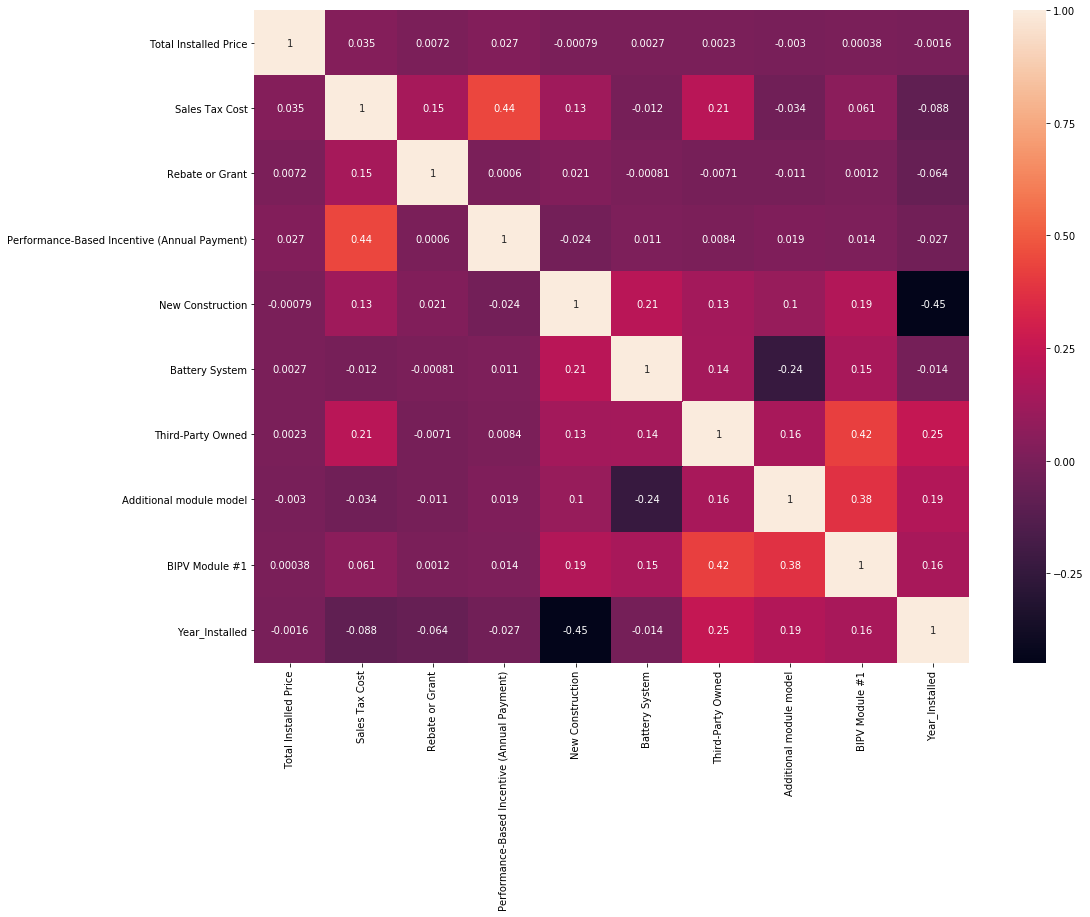

In [33]:
# Heatmap with everyone - ROUND 2.  
plt.figure(figsize=(16, 12))
sns.heatmap(X_train.corr(),annot=True);

In [34]:
# OLS - Revision 1
# So keep in mind, this is the first time we do it.

y1 = y_train.astype(float)
x1 = X_train[['Total Installed Price', 'Sales Tax Cost', 'Rebate or Grant',
       'Performance-Based Incentive (Annual Payment)',
       'BIPV Module #1', 
       'Year_Installed',
       'New Construction', 'Battery System',
       'Third-Party Owned'
        ]].astype(float)
# second line is new additions
# Removed System Size and Total Installed Price (Becaues this made up cost_per_kwp)

x = sm.add_constant(x1)

results = sm.OLS(y1, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            System Size   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     27.36
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           6.30e-48
Time:                        02:53:42   Log-Likelihood:            -1.0292e+07
No. Observations:             1048663   AIC:                         2.058e+07
Df Residuals:                 1048653   BIC:                         2.058e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -1234.3891   3983.083     -0.310      0.757   -9041.097    6572.318
Total Installed Price                           4.3e-07   9.18e-07      0.468      0.640   -1.37e-06    2.23e-06
Sales Tax Cost                                   0.0028      0.001      4.957      0.000       0.002       0.004
Rebate or Grant                                  0.0004   6.04e-05      6.406      0.000       0.000       0.001
Performance-Based Incentive (Annual Payment)     0.0036      0.001      6.010      0.000       0.002       0.005
BIPV Module #1                                  -0.0048      0.001     -4.142      0.000      -0.007      -0.003
Year_Installed                                   0.6480      1.979      0.327      0.743      -3.232       4.528
New Construction                                -0.0029      0.001     -2.342      0.019      -0.005      -0.000
Battery System                                   0.0099      0.001      7.099      0.000       0.007       0.013
Third-Party Owned                               -0.0042      0.001     -3.351      0.001      -0.007      -0.002
=================================================================================
Omnibus:                  7264927.660   Durbin-Watson:                      1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   18372736667658860.000
Skew:                         750.497   Prob(JB):                            0.00
Kurtosis:                  648448.394   Cond. No.                        4.34e+09
=================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizations below.  Supplementary info.

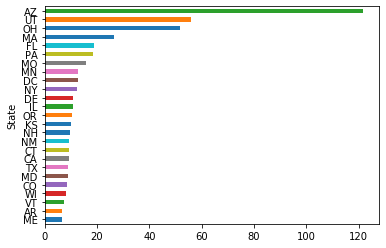

In [35]:
df.groupby('State')['System Size'].mean().sort_values().plot.barh();


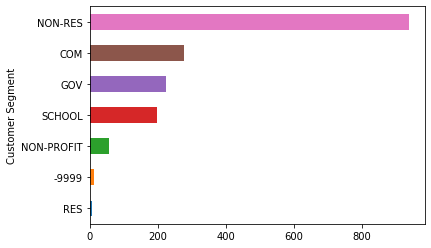

In [36]:
df.groupby('Customer Segment')['System Size'].mean().sort_values().plot.barh();


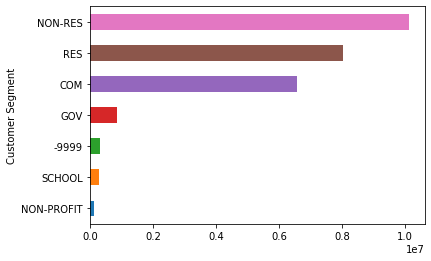

In [37]:
df.groupby('Customer Segment')['System Size'].sum().sort_values().plot.barh();

In [38]:
df['Customer Segment'].value_counts()

RES           1096601
-9999           26726
COM             23874
NON-RES         10788
GOV              3904
NON-PROFIT       2500
SCHOOL           1502
Name: Customer Segment, dtype: int64

In [39]:
df_new = df.groupby(['Year_Installed'])['System Size'].count().reset_index()  # reset_index created a new df from series

In [40]:
df_new = df.groupby(['Year_Installed'])['System Size'].count().reset_index()  # reset_index created a new df from series

In [41]:
df_new.columns = ['Year', 'Installations']

In [42]:
df_new['YoY Growth'] = (df_new['Installations'] - df_new['Installations'].shift(1)) / df_new['Installations']  # means shift the installation value

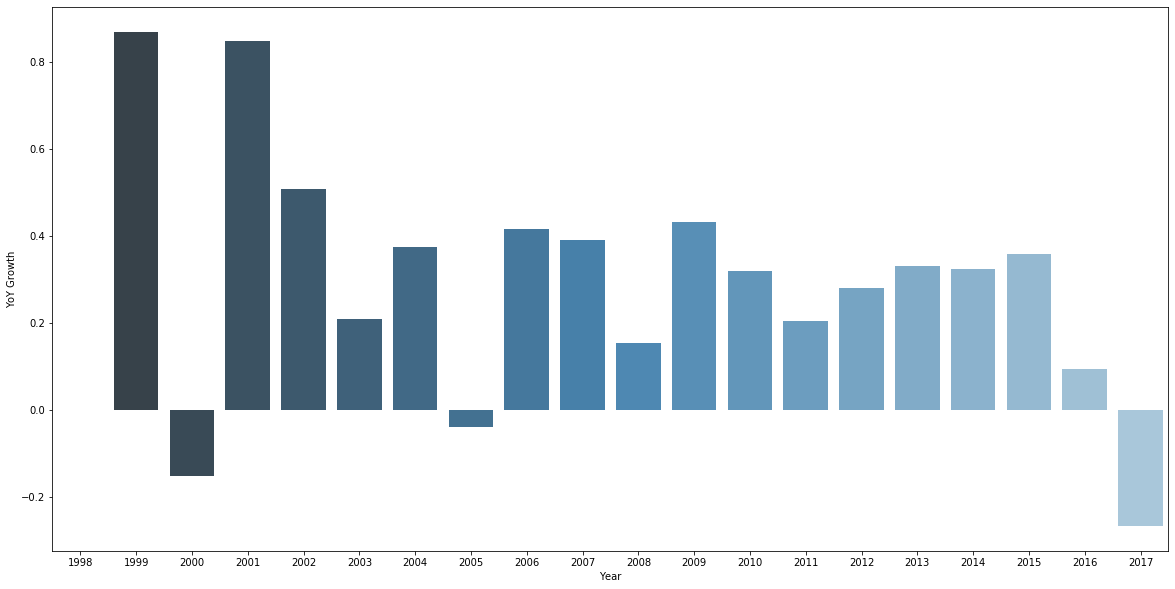

In [43]:
plt.figure(figsize=(20, 10))
ax = sns.barplot("Year", y='YoY Growth', data=df_new,
                  palette="Blues_d")

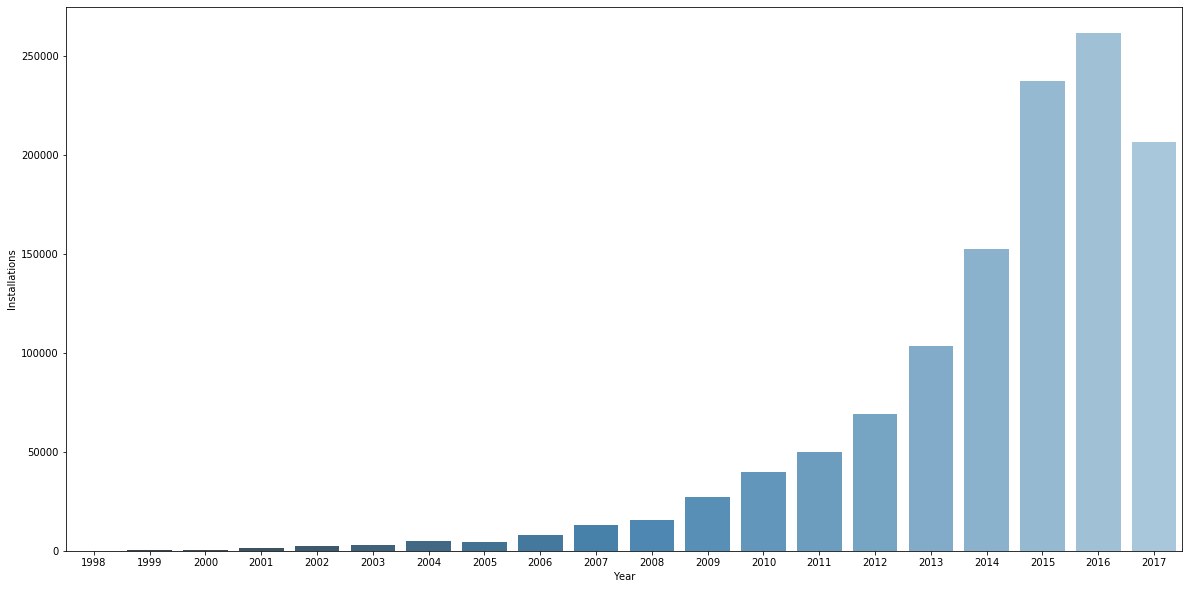

In [44]:
plt.figure(figsize=(20, 10))
ax = sns.barplot("Year", y="Installations", data=df_new,
                  palette="Blues_d")

In [45]:
df_size_sum = df.groupby(['Year_Installed'])['System Size'].sum().reset_index()
df_size_sum

,Year_Installed,System Size
0,1998,5.895315e+01
1,1999,9.532135e+02
2,2000,6.963239e+02
3,2001,4.666673e+03
4,2002,2.263393e+04
5,2003,2.429476e+04
6,2004,3.707848e+04
7,2005,4.294372e+04
8,2006,6.571564e+04
9,2007,1.163877e+05


In [46]:
df_size_sum.columns = ['Year', 'System Size']

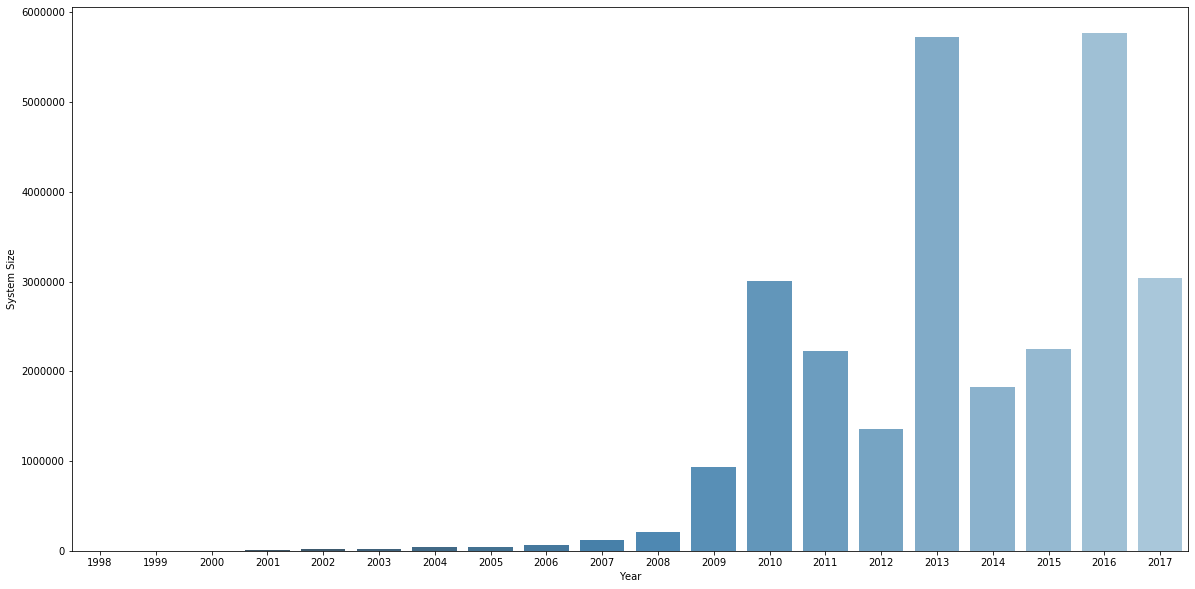

In [47]:
plt.figure(figsize=(20, 10))
ax = sns.barplot("Year", y="System Size", data=df_size_sum,
                  palette="Blues_d")

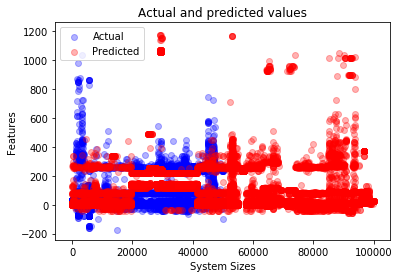

In [63]:
# This is incorrect -- should be a scatter on (y_pred_val,y_val)
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_pred_test.size), y=y_pred_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_val.size), y=y_pred_val, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('System Sizes')
plt.ylabel('Features')
plt.legend()
plt.show()

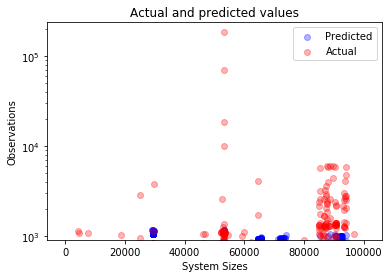

In [77]:
# This looks better, but we need to do a log form due to the axis being too high.
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_pred_val.size), y=y_pred_val, c = 'blue', label = 'Predicted', alpha = 0.3)
ax.scatter(x = range(0, y_val.size), y=y_val, c = 'red', label = 'Actual', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('System Sizes')
plt.ylabel('Observations')

ax.set_yscale('log')
plt.legend()
plt.show()

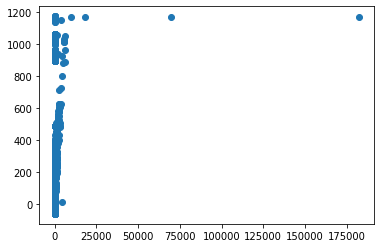

In [82]:
plt.scatter(x=y_val,y=y_pred_val)

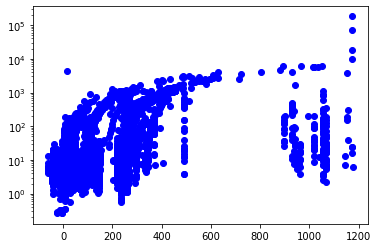

In [89]:
_, ax = plt.subplots()
plt.scatter(x=y_pred_val,y=y_val, c = 'blue')
ax.set_yscale('log')
plt.show()

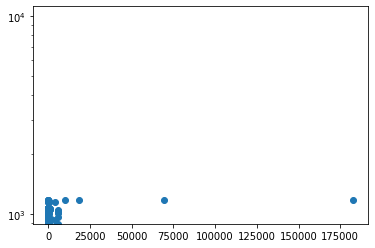

In [87]:
_, ax = plt.subplots()
plt.scatter(x=y_val,y=y_pred_val)
ax.set_yscale('log')
plt.show()

In [65]:
y_pred_val.shape, y_val.shape

((100000,), (100000,))

In [55]:
states_for_graph = ['KS', 'DE', 'OH', 'FL', 'WI',
                    'MO', 'NH', 'MN', 'DC', 'OR',
                    'MD', 'NM', 'CT', 'CO', 'TX',
                    'NY', 'UT', 'AZ', 'MA', 'CA']

In [70]:

fig = go.Figure(data=go.Choropleth(
    locations=states_for_graph, # Spatial coordinates
    z = df_new['Installations'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Installations (#)",
))

fig.update_layout(
    title_text = 'Solar Installations: 1998 - 2017',
    geo_scope='usa', # limite map scope to USA
)

fig.show()